In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# Load dataset
df = pd.read_csv("clusteringweek06.csv")

# Preprocessing: drop kolom 'x1' jika ini adalah ID atau label
if 'x1' in df.columns:
    df = df.drop(columns=['x1'])

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

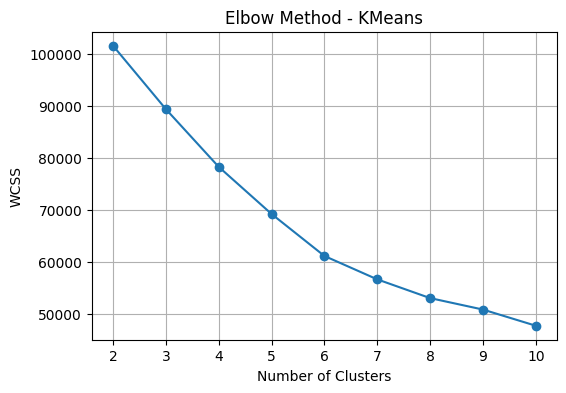

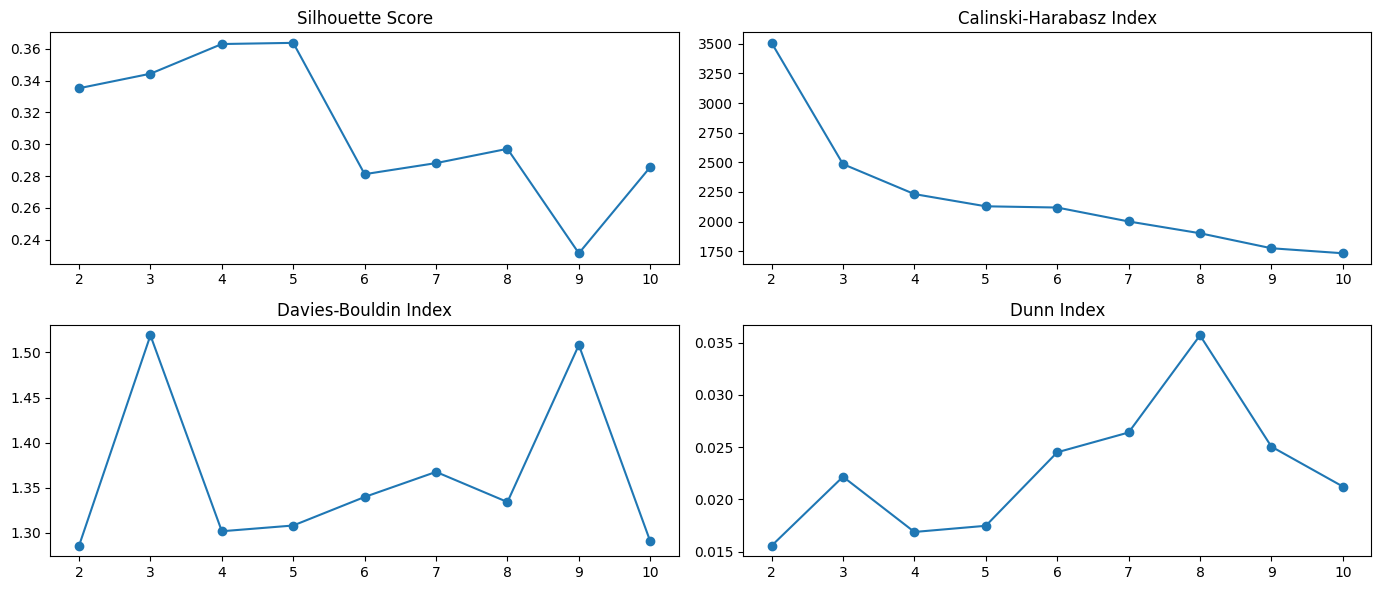

In [3]:
# ---- METODE 1: KMeans Clustering ----

# Elbow Method untuk KMeans
wcss = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method - KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Evaluasi KMeans
silhouette_scores = []
ch_scores = []
db_scores = []
dunn_scores = []

def dunn_index(X, labels):
    distances = squareform(pdist(X))
    unique_clusters = np.unique(labels)
    intra_dists = []
    inter_dists = []
    for c in unique_clusters:
        indices = np.where(labels == c)[0]
        intra = np.max([distances[i, j] for i in indices for j in indices if i != j])
        intra_dists.append(intra)
    for i in range(len(unique_clusters)):
        for j in range(i+1, len(unique_clusters)):
            c1 = np.where(labels == unique_clusters[i])[0]
            c2 = np.where(labels == unique_clusters[j])[0]
            inter = np.min([distances[m, n] for m in c1 for n in c2])
            inter_dists.append(inter)
    return np.min(inter_dists) / np.max(intra_dists)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))
    dunn_scores.append(dunn_index(X_scaled, labels))

# Plot semua metrik evaluasi
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o'); plt.title('Silhouette Score')
plt.subplot(2, 2, 2)
plt.plot(k_range, ch_scores, marker='o'); plt.title('Calinski-Harabasz Index')
plt.subplot(2, 2, 3)
plt.plot(k_range, db_scores, marker='o'); plt.title('Davies-Bouldin Index')
plt.subplot(2, 2, 4)
plt.plot(k_range, dunn_scores, marker='o'); plt.title('Dunn Index')
plt.tight_layout()
plt.show()

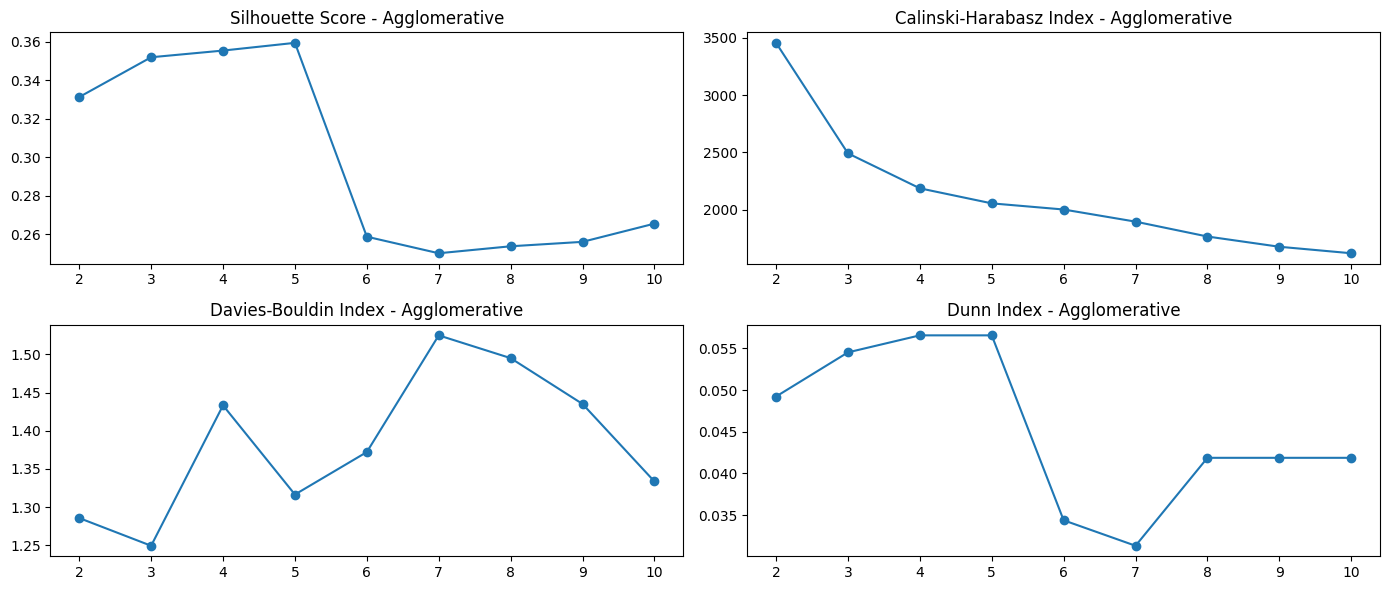

In [6]:
# ---- METODE 2: Agglomerative Clustering ----

agg_silhouette = []
agg_ch = []
agg_db = []
agg_dunn = []

for k in k_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X_scaled)
    agg_silhouette.append(silhouette_score(X_scaled, labels))
    agg_ch.append(calinski_harabasz_score(X_scaled, labels))
    agg_db.append(davies_bouldin_score(X_scaled, labels))
    agg_dunn.append(dunn_index(X_scaled, labels))

plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
plt.plot(k_range, agg_silhouette, marker='o'); plt.title('Silhouette Score - Agglomerative')
plt.subplot(2, 2, 2)
plt.plot(k_range, agg_ch, marker='o'); plt.title('Calinski-Harabasz Index - Agglomerative')
plt.subplot(2, 2, 3)
plt.plot(k_range, agg_db, marker='o'); plt.title('Davies-Bouldin Index - Agglomerative')
plt.subplot(2, 2, 4)
plt.plot(k_range, agg_dunn, marker='o'); plt.title('Dunn Index - Agglomerative')
plt.tight_layout()
plt.show()



### Penjelasan Metrik Evaluasi Clustering

Berikut adalah metrik evaluasi yang digunakan untuk menilai kualitas hasil clustering:

- **Silhouette Score**  
  Persamaan:
  $$
  s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
  $$
  Di mana:
  - \( a(i) \): rata-rata jarak antara titik \(i\) dan semua titik dalam klusternya sendiri.
  - \( b(i) \): rata-rata jarak antara titik \(i\) dan semua titik pada kluster terdekat.

  Nilai Silhouette Score berada pada rentang [-1, 1]. Nilai mendekati 1 menunjukkan pemisahan kluster yang baik.

- **Calinski-Harabasz Index (CH)**  
  Persamaan:
  $$
  CH = \frac{\text{Tr}(B_k)}{k - 1} \Big/ \frac{\text{Tr}(W_k)}{n - k}
  $$
  Di mana:
  - \( 	ext{Tr}(B_k) \): variansi antar kluster.
  - \( 	ext{Tr}(W_k) \): variansi dalam kluster.
  - \( n \): jumlah total sampel.
  - \( k \): jumlah kluster.

  Nilai CH yang lebih tinggi menunjukkan kluster yang lebih padat dan terpisah baik.

- **Davies-Bouldin Index (DBI)**  
  Persamaan:
  $$
  DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d_{ij}} \right)
  $$
  Di mana:
  - \( \sigma_i \): jarak rata-rata antara anggota kluster \(i\) dengan centroid-nya.
  - \( d_{ij} \): jarak antara centroid kluster \(i\) dan \(j\).

  Semakin rendah nilai DBI, semakin baik kualitas clustering.

- **Dunn Index**  
  Persamaan:
  $$
  D = \frac{\min_{1 \leq i < j \leq k} d(C_i, C_j)}{\max_{1 \leq l \leq k} diam(C_l)}
  $$
  Di mana:
  - \( d(C_i, C_j) \): jarak antar kluster.
  - \( diam(C_l) \): diameter dari kluster \(l\).

  Nilai Dunn Index yang tinggi menunjukkan kluster yang terpisah jauh dan kompak.


Analisis Perbandingan:
1. Silhouette Score
KMeans: puncaknya di k=5 (sekitar 0.36).

Agglomerative: juga puncaknya di k=5 (sekitar 0.36+).
➡️ Seri — keduanya menunjukkan skor yang baik di k=5.

2. Calinski-Harabasz Index
KMeans: tertinggi di k=2, lalu menurun tajam.

Agglomerative: juga tertinggi di k=2, lalu menurun.
➡️ Seri, tapi ini mengindikasikan kemungkinan struktur alami data di k=2.

3. Davies-Bouldin Index
KMeans: nilai terendah sekitar k=2 (baik).

Agglomerative: juga menunjukkan nilai terendah di k=2.
➡️ Seri, sama-sama menunjukkan cluster baik di k=2.

4. Dunn Index
KMeans: tertinggi di k=8.

Agglomerative: tertinggi di k=5–6.
➡️ Sedikit unggul Agglomerative, karena nilai Dunn Index-nya lebih konsisten tinggi.

5. WSS (Elbow Method) — hanya untuk KMeans
Terlihat ada elbow di sekitar k=4 atau k=5.
➡️ Menunjukkan k=5 sebagai titik optimal.

Kesimpulan:
KMeans dan Agglomerative Clustering menunjukkan performa yang sangat mirip, dengan k=5 sebagai kandidat kuat jumlah cluster optimal.

KMeans unggul dalam WSS (Elbow Method).

Agglomerative sedikit lebih baik dalam Dunn Index dan konsistensi skor.